In [70]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1), (2,2), (8,3), (5,3)]

In [71]:
rota = [origem] + enderecos + [destino]

In [72]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

In [73]:
import matplotlib.pyplot as plt

In [74]:
from scipy.spatial.distance import euclidean as distancia_euclidiana

13.733044070171104


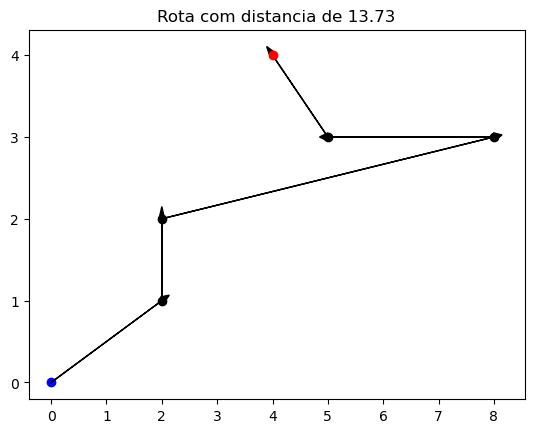

In [75]:
tamanho_rota = len(rota)
distancia_percorrida = 0

for i in range(tamanho_rota):
    x,y = rota[i]
    cor = "black"
    if i == 0:
        cor = "blue"
    elif i == tamanho_rota - 1:
        cor = "red"
    plt.scatter(x,y, color = cor)
    if i < tamanho_rota - 1:
        x1,y1 = rota[i+1]
        dx= x1 - x
        dy = y1 - y
        plt.arrow(x,y, dx, dy, color = 'black', head_width = 0.1 )
        distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])
        
plt.title(f'Rota com distancia de {distancia_percorrida:.2f}')
print(distancia_percorrida)

In [76]:
def desenhar_rota(origem, destino, enderecos):
    rota = [origem] + enderecos + [destino]
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]
        cor = "black"
        if i == 0:
            cor = "blue"
        elif i == tamanho_rota - 1:
            cor = "red"
        plt.scatter(x,y, color = cor)
        if i < tamanho_rota - 1:
            x1,y1 = rota[i+1]
            dx= x1 - x
            dy = y1 - y
            plt.arrow(x,y, dx, dy, color = 'black', head_width = 0.1 )
            distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])
            
    plt.title(f'Rota com distancia de {distancia_percorrida:.2f}')
    print(distancia_percorrida)

14.567196007456046


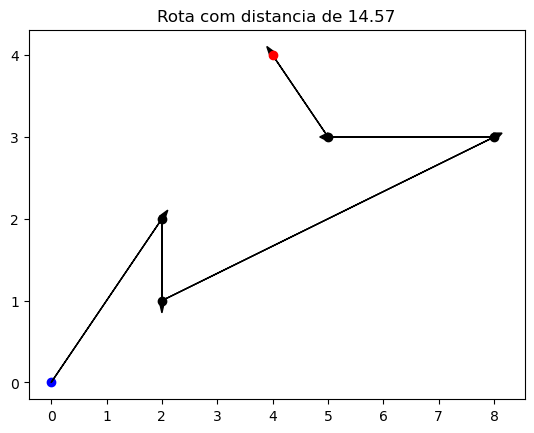

In [77]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1), (8,3), (5,3)]

desenhar_rota(origem, destino, enderecos)

In [78]:
from itertools import permutations

In [79]:
def calcular_distancia_rota(rota):
    distancia = 0
    tamanho_rota = len(rota)
    for i in range(tamanho_rota):
        if i < tamanho_rota - 1:
            distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])
    return distancia

In [80]:
def desenhar_rota(rota):
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]
        cor = "black"
        if i == 0:
            cor = "blue"
        elif i == tamanho_rota - 1:
            cor = "red"
        plt.scatter(x,y, color = cor)
        if i < tamanho_rota - 1:
            x1,y1 = rota[i+1]
            dx= x1 - x
            dy = y1 - y
            plt.arrow(x,y, dx, dy, color = 'black', head_width = 0.1 )
            distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])
            
    plt.title(f'Rota com distancia de {distancia_percorrida:.2f}')
    print(distancia_percorrida)

In [81]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3)]

rota = [origem] + enderecos + [destino]

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583
13.52145126328583


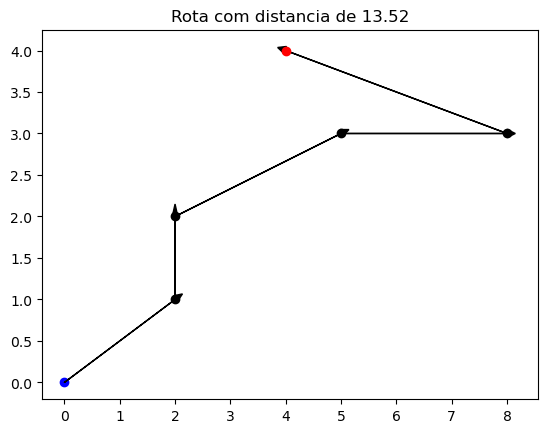

In [82]:
menor_distancia = float('inf')
menor_rota = None
for permutacao in permutations(enderecos):
    rota = [origem] + list(permutacao) + [destino]
    distancia_rota = calcular_distancia_rota(rota)

    if distancia_rota < menor_distancia:
        menor_distancia = distancia_rota
        menor_rota = rota

print(menor_rota, menor_distancia)
desenhar_rota(menor_rota)



# Método da força bruta(exaustivo)

In [83]:
def forca_bruta(origem, destino, enderecos):
    menor_distancia = float('inf')
    menor_rota = None
    for permutacao in permutations(enderecos):
        rota = [origem] + list(permutacao) + [destino]
        distancia_rota = calcular_distancia_rota(rota)

        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    return(menor_rota, menor_distancia)



In [84]:
# origem = (0,0)
# destino = (4,4)

# enderecos = [(2,2), (2,1), (5,3), (8,3), (10,5), (9,4), (8,7), (6,3), (9,6), (7,5)]

# menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
# desenhar_rota(menor_rota)

# Vizinho mais proximo (abordagem gulosa)

In [85]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3)]

In [86]:
def vizinho_mais_proximo(origem, destino, endereco):

    ponto_atual = origem
    enderecos_restantes = enderecos.copy()

    distancia_percorrida = 0
    menor_rota = [ponto_atual]

    while enderecos_restantes:
        # Encontrar o ponto mais proximo do ponto atual
        menor_distancia = float('inf')
        ponto_mais_proximo = None
        for endereco in enderecos_restantes:
            distancia = distancia_euclidiana(ponto_atual, endereco)
            if distancia < menor_distancia:
                menor_distancia = distancia
                ponto_mais_proximo = endereco
                
        #remover esse ponto da lista de enderecos
        enderecos_restantes.remove(ponto_mais_proximo)
        #adicionar esse ponto na menor_rota
        menor_rota.append(ponto_mais_proximo)
        #atualizar a distancia_percorrida
        distancia_percorrida = distancia_percorrida + menor_distancia
        #atualizar o ponto atual
        ponto_atual = ponto_mais_proximo
        
    menor_rota.append(destino)
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual, destino)

    return menor_rota, distancia_percorrida

20.45354552482872


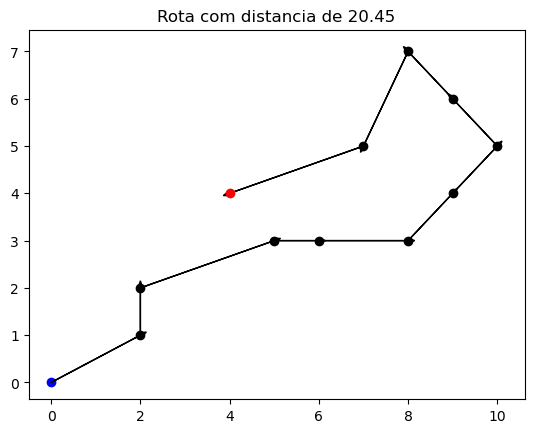

In [87]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3), (10,5), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

19.373182497877814


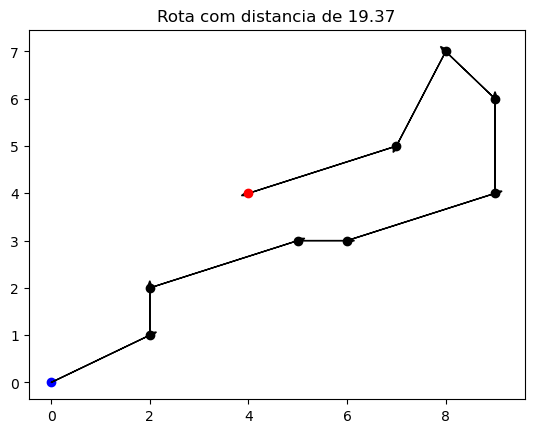

In [88]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

20.284695155040843


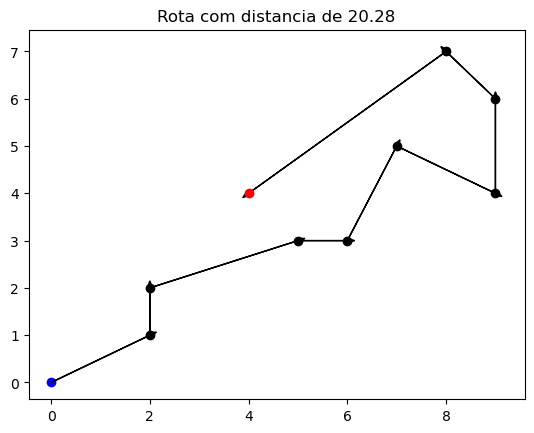

In [89]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

# Algoritmos géneticos

In [90]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1), (2,2), (8,3), (5,3)]

In [91]:
# função de avaliação

# individuo = [0, 1, 2, 3]

def avaliar(individuo, origem, enderecos, destino):
    rota = [origem]
    for i in individuo:
        rota.append(enderecos[i])
    rota.append(destino)
    
    distancia_percorrida = calcular_distancia_rota(rota)
    
    return distancia_percorrida,

In [92]:
!pip install deap

In [93]:
from deap import base, creator, tools, algorithms
import numpy as np

In [94]:
# Definição do tamanho da população inicial
tam_populacao_inicial = 100

# Probabilidade de cruzamento entre indivíduos
prob_cruzamento = 0.7

# Probabilidade de mutação de um gene em um indivíduo
prob_mutacao = 0.1

# Número total de gerações que o algoritmo irá evoluir
numero_geracoes = 100

# Criação de uma classe chamada 'FitnessMin' que define o objetivo como minimizar a função de aptidão
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))

# Criação de uma classe chamada 'individuo' que representa um indivíduo, sendo uma lista com atributo de aptidão definido pela classe 'FitnessMin'
creator.create('individuo', list, fitness=creator.FitnessMin)

# Registro de uma função chamada 'Genes' que utiliza a função np.random.permutation para gerar uma permutação aleatória dos genes com base no número de 'enderecos'
toolbox.register("Genes", np.random.permutation, len(enderecos))

# Registro de uma função chamada 'Individuos' que inicializa um indivíduo chamando a função 'initIterate' com base na classe 'individuo' e na função 'Genes'
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

# Registro de uma função chamada 'Populacao' que inicializa uma população com base na função 'initRepeat', utilizando a lista e a função 'Individuos' registrada anteriormente
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

# Inicialização da população com o tamanho definido previamente
populacao = toolbox.Populacao(n=tam_populacao_inicial)

# Registro de operadores genéticos: cruzamento, mutação, seleção e avaliação
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

# Configuração do algoritmo genético: algoritmo eaSimple da biblioteca DEAP, utilizando os operadores registrados, probabilidade de cruzamento e mutação, número de gerações e sem exibição de informações durante a execução (verbose=False)
algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,
                                mutpb=prob_cruzamento,
                                ngen=numero_geracoes,
                                verbose=False)

# Seleção do melhor indivíduo da população após a evolução
melhor_ind = tools.selBest(populacao, 1)[0]


c:\Users\Filip\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Filip\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [95]:
melhor_ind

[0, 1, 3, 2]

13.52145126328583


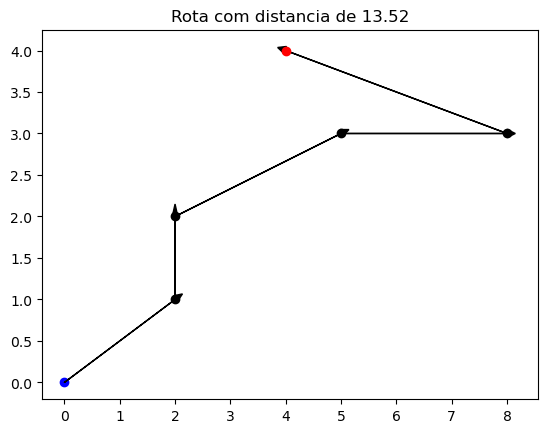

In [97]:
menor_rota = [origem] 
for i in melhor_ind:
    menor_rota.append(enderecos[i])
menor_rota.append(destino)

desenhar_rota(menor_rota)

In [101]:
def algoritmo_genetico(origem,destino, enderecos,tam_populacao_inicial = 100, prob_cruzamento = 0.7, prob_mutacao = 0.1, numero_geracoes = 100):
    # Definição do tamanho da população inicial
    # Probabilidade de cruzamento entre indivíduos
    # Probabilidade de mutação de um gene em um indivíduo
    # Número total de gerações que o algoritmo irá evoluir

    # Criação de uma classe chamada 'FitnessMin' que define o objetivo como minimizar a função de aptidão
    creator.create('FitnessMin', base.Fitness, weights=(-1.0,))

    # Criação de uma classe chamada 'individuo' que representa um indivíduo, sendo uma lista com atributo de aptidão definido pela classe 'FitnessMin'
    creator.create('individuo', list, fitness=creator.FitnessMin)

    # Registro de uma função chamada 'Genes' que utiliza a função np.random.permutation para gerar uma permutação aleatória dos genes com base no número de 'enderecos'
    toolbox.register("Genes", np.random.permutation, len(enderecos))

    # Registro de uma função chamada 'Individuos' que inicializa um indivíduo chamando a função 'initIterate' com base na classe 'individuo' e na função 'Genes'
    toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

    # Registro de uma função chamada 'Populacao' que inicializa uma população com base na função 'initRepeat', utilizando a lista e a função 'Individuos' registrada anteriormente
    toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

    # Inicialização da população com o tamanho definido previamente
    populacao = toolbox.Populacao(n=tam_populacao_inicial)

    # Registro de operadores genéticos: cruzamento, mutação, seleção e avaliação
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

    # Configuração do algoritmo genético: algoritmo eaSimple da biblioteca DEAP, utilizando os operadores registrados, probabilidade de cruzamento e mutação, número de gerações e sem exibição de informações durante a execução (verbose=False)
    algoritmo = algorithms.eaSimple(populacao,
                                    toolbox,
                                    cxpb=prob_cruzamento,
                                    mutpb=prob_cruzamento,
                                    ngen=numero_geracoes,
                                    verbose=False)

    # Seleção do melhor indivíduo da população após a evolução
    melhor_ind = tools.selBest(populacao, 1)[0]
    
    menor_rota = [origem] 
    for i in melhor_ind:
        menor_rota.append(enderecos[i])
    menor_rota.append(destino)
    
    distancia_percorrida = calcular_distancia_rota(menor_rota)
    
    return menor_rota, distancia_percorrida


c:\Users\Filip\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Filip\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


19.373182497877814


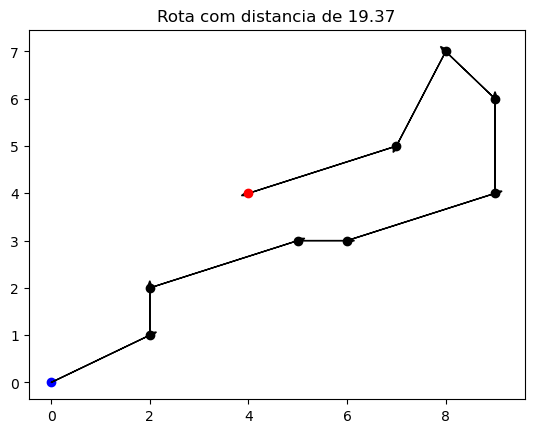

In [102]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = algoritmo_genetico(origem, destino, enderecos)
desenhar_rota(menor_rota)

20.45354552482872


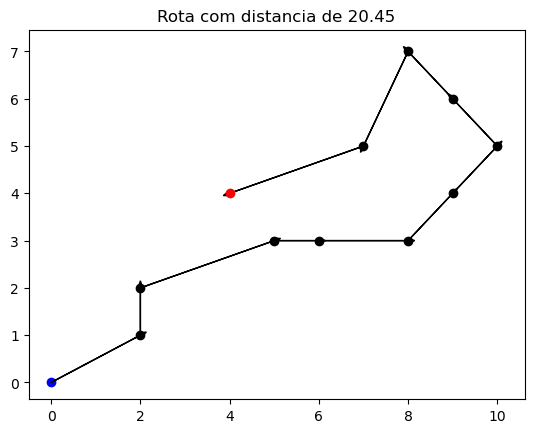

In [109]:

enderecos = [(2,2), (2,1), (5,3), (8,3), (10,5), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = algoritmo_genetico(origem, destino, enderecos)
desenhar_rota(menor_rota)